In [3]:
from bs4 import BeautifulSoup
import requests
import time
import datetime
import re
import csv
import pandas as pd
import re
import numpy as np
import smtplib
import seaborn as sb
from itertools import islice, takewhile
from itertools import zip_longest
from nltk import flatten
import itertools
sb.set()

import matplotlib.pyplot as plt



from dateutil import parser
from datetime import date
from pprint import pprint


from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from oauth2client.service_account import ServiceAccountCredentials
import datetime
from apiclient.discovery import build

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 50)
pd.set_option('display.expand_frame_repr', True)



In [4]:


# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


                                # IMPORTANTE
                                # procurar por comentários, são 3
                                # "ALTERAR AQUI"


# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!



# # contador de execucao
start_time = time.time()



# google

scopes = ["https://www.googleapis.com/auth/spreadsheets",
          "https://www.googleapis.com/auth/drive"
]

    
def main(lista):
    spreadsheet_id = '1cIq9FvjiIxy8ronOr4X7Jv00gKuiDG0ccXwZb1BxJi0'  # this is part of the url of google

    credentials = ServiceAccountCredentials.from_json_keyfile_name("C:\\Users\\Cássio Berger\\Documents\\Programação\\_scripts - nao mexer\\b3-acoes-correlacao-2024-70b57f34f473.json", scopes=scopes)
    service = build('sheets', 'v4', credentials=credentials)

    # definindo onde ira escrever (aba!intervalo celulas)
    service.spreadsheets().values().append(
        spreadsheetId=spreadsheet_id,
        range="[script] correlação!A1",
        body={
            "majorDimension": "ROWS",
            "values": lista,
        },
        valueInputOption="USER_ENTERED"
    ).execute() 

########################################################    
    
    
# seta as credenciais para acesso; usando conta de serviço registrada; seta o alvo a ser escrito
# Source: https://developers.google.com/sheets/api/quickstart/python
def get_or_create_credentials(scopes):
    credentials = None
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            credentials = pickle.load(token)
    if not credentials or not credentials.valid:
        if credentials and credentials.expired and credentials.refresh_token:
            credentials.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file('C:\\Users\\Cássio Berger\\Documents\\Programação\\_scripts - nao mexer\\b3-acoes-correlacao-2024-70b57f34f473.json', scopes)
            credentials = flow.run_local_server(port=0)
            print("\n\nAchou json")
        with open('token.pickle', 'wb') as token:
            pickle.dump(credentials, token)
    return credentials


########################################################



In [17]:

########################################################
########################################################
########################################################
########################################################

# lista de ações a serem pesquisadas (fonte PLANILHA)
#https://docs.google.com/spreadsheets/d/1R504OJcC8gFd-b62WvENz8p-crcLtl2qGbp3tg3A_vY/edit#gid=610897588

# lista das acoes
nomes_acoes=['GOAU4','AGRO3','CMIN3','ABCB4','TAEE4','SAPR11','SAPR4','VULC3','ALOS3','TCSA3']           # <------------------------------- ALTERAR AQUI, adicionar tickers manualmente

# lista das acoes teste
#nomes_acoes=['GOAU4']


############################


# links para ações
# <---------------------------------------------------------------------------------- -------------------------------------------- ALTERAR AQUI, adicionar link manualmente
acoes_urls = ['https://www.infomoney.com.br/cotacoes/b3/acao/gerdau-met-goau4/historico/#page4', 
              'https://www.infomoney.com.br/cotacoes/b3/acao/brasilagro-agro3/historico/#page4' , 
              'https://www.infomoney.com.br/cotacoes/b3/acao/csn-mineracao-cmin3/historico/#page4',
              'https://www.infomoney.com.br/cotacoes/b3/acao/banco-abc-brasil-abcb4/historico/#page4',
              'https://www.infomoney.com.br/cotacoes/b3/acao/taesa-taee4/historico/#page4',
              'https://www.infomoney.com.br/cotacoes/b3/acao/sanepar-sapr11/historico/#page4',
              'https://www.infomoney.com.br/cotacoes/b3/acao/sanepar-sapr4/historico/#page4',
              'https://www.infomoney.com.br/cotacoes/b3/acao/vulcabras-vulc3/historico/#page4',
              'https://www.infomoney.com.br/cotacoes/b3/acao/aliansce-sonae-shopping-centers-alos3/historico/#page4',
              'https://www.infomoney.com.br/cotacoes/b3/acao/tecnisa-tcsa3/historico/#page4']

## link ação teste
#acoes_url='https://www.infomoney.com.br/cotacoes/b3/acao/gerdau-met-goau4/historico/#page1'

############################
# selenium start

service = Service()

options = webdriver.ChromeOptions()

driver = webdriver.Chrome(service=service, options=options)

############################


# contador para criar OU anexar em arquivo
cont = 0

# dataframe com todas inforamções da ações
pd_acoes_all = pd.DataFrame()



# laço
#for acao in acoes_urls:
for i in range(0, len(acoes_urls)):
    #driver.implicitly_wait(3)
    #print('\n Nome da acao: ', nomes_acoes[i])
    #print('\n URL da acao: ', acoes_urls[i])

    acao_url = str(acoes_urls[i])


    ############################
    # selenium espera e pega url
    # tempo de espera, para carregar infos; pode aumentar


    ############################
    # selenium wait 

    #time.sleep(15)
    driver.get(acao_url)

    # pega titulo, para debug
    get_title = driver.title 
    #print('\n TITULO da aba: ', get_title)


    ############################
    # tempo de espera, para carregar infos; pode aumentar
    time.sleep(15)


    ############################
    # encontrando table com dados
    table = []

    table=driver.find_element(By.ID, 'quotes_history').text


    ############################

    # print verificação
#    print('\n\n############################Tabela')
#    print(str(table))



    ############################ 
    # criando e salvando lista em dataframe
    # cria lista para salvar linhas individuais em str, e pois em dataframe

    data = []

    data.append('ZXY' + nomes_acoes[i] + '')

    for linha in table:
        data.append(str(linha))
#        print("\n\nLINHAS\n")
#        print(linha)




#    print("\n\nData")
#    print(str(data))



    # criação de data frame e setando informações
    acoes_scraping = pd.DataFrame(data)
    acoes_scraping = acoes_scraping.astype(str)
    acoes_scraping = acoes_scraping.T



    # trocando caracteres especiais para evitar erros futuros
    for j in acoes_scraping:
        acoes_scraping[j] = acoes_scraping[j].replace('"\s"', ';', regex=True)
        acoes_scraping[j] = acoes_scraping[j].replace(' ', ';', regex=True)
        acoes_scraping[j] = acoes_scraping[j].replace(',', '.', regex=True)


    ############################

    #print verificação

#    print('\n\############################\ DFrame:')
#    print(acoes_scraping)

    # verifica se é a primeira ação ou não; cria ou anexa arquivo
    if cont==0:
        acoes_scraping.to_csv("correlacao_1.csv", encoding='utf-8-sig', mode='w', sep=' ', header=False,index=False)
        print(f'@@@@@@@@@@ Linha Escrita no arquivo, {nomes_acoes[i]} @@@@@@@@@@')
        print('############################Arquivo criado')
        cont+=1

    else:
        acoes_scraping.to_csv("correlacao_1.csv", encoding='utf-8-sig', mode='a', sep=' ', header=False,index=False)
        print(f'@@@@@@@@@@ Linha Anexada no arquivo, {nomes_acoes[i]} @@@@@@@@@@')
        #print('$$$$$$$$$$Arquivo anexado')
        
    
    ############################
    
# fecha driver do selenium
driver.quit()
    
    # fim do loop
    
    
print('\n####################################################################################')
print('\n############################ FIM DA EXECUCAO ############################\n')
print('####################################################################################')
    
    ############################
    

    
# lendo dataframe do arquivo anterior
pd_acoes_all=pd.read_csv('correlacao_1.csv', header = None, delimiter=";", quoting=csv.QUOTE_NONE, encoding='utf-8')


# removendo caracteres e espaços inúteis
for column in pd_acoes_all.columns:
    pd_acoes_all[column] = pd_acoes_all[column].astype(str).apply(lambda x: re.sub("[^A-Za-z0-9,./]", "", str(x)))

pd_acoes_all = pd_acoes_all[pd_acoes_all[column].str.strip().astype(bool)]

    
# resalvando dataframe no arquivo 2
try:
    pd_acoes_all.to_csv("correlacao_2.csv", encoding='utf-8-sig', mode='w', sep=' ', header=False,index=False)
    print('\n############################Dataframe salvo e arquivo criado')
    
except:
    print("\n\n----------> DATAFRAME correto não salvo; ERRO")
    

    ############################




print("\n\n----------> data frame inteiro carregado")
print(pd_acoes_all.tail())
print("Tamanho Dataframe: ", pd_acoes_all.size)


@@@@@@@@@@ Linha Escrita no arquivo, GOAU4 @@@@@@@@@@
############################Arquivo criado
@@@@@@@@@@ Linha Anexada no arquivo, AGRO3 @@@@@@@@@@
@@@@@@@@@@ Linha Anexada no arquivo, CMIN3 @@@@@@@@@@
@@@@@@@@@@ Linha Anexada no arquivo, ABCB4 @@@@@@@@@@
@@@@@@@@@@ Linha Anexada no arquivo, TAEE4 @@@@@@@@@@
@@@@@@@@@@ Linha Anexada no arquivo, SAPR11 @@@@@@@@@@
@@@@@@@@@@ Linha Anexada no arquivo, SAPR4 @@@@@@@@@@
@@@@@@@@@@ Linha Anexada no arquivo, VULC3 @@@@@@@@@@
@@@@@@@@@@ Linha Anexada no arquivo, ALOS3 @@@@@@@@@@
@@@@@@@@@@ Linha Anexada no arquivo, TCSA3 @@@@@@@@@@

####################################################################################

############################ FIM DA EXECUCAO ############################

####################################################################################

############################Dataframe salvo e arquivo criado


----------> data frame inteiro carregado
               0     1     2     3     4     5        6
2005  27

NameError: name 'dataframe_size' is not defined

In [18]:

# deixando apenas coluna 'data'[0], 'variação'[3] e título da ação
variacos_para_correlacao = pd_acoes_all.iloc[:, [0, 3]]




variacos_para_correlacao =  variacos_para_correlacao.rename({0: 'Data', 3: 'Variacao'}, axis='columns')

#print("\nVariacos para correlacao :")
#print(variacos_para_correlacao)


############################

# separa para saber quais linhas possuem o codigo da acao
indices_acoes = variacos_para_correlacao[variacos_para_correlacao['Data'].map(lambda x: 'ZXY' in x)]
indices_acoes_lixo = variacos_para_correlacao[variacos_para_correlacao['Data'].map(lambda x: 'Car' in x)]

#print("\nIndices indices_acoes_lixo: ")
#print(indices_acoes_lixo)


# filtra as linhas que possuem caracteres inuteis, como falta de dados
filter = indices_acoes['Data'].str.contains('Carr')
filtered_df = indices_acoes[~filter]
#print('\n filtrado: ', filtered_df)


############################


# pega o número de indices para manipulação para planilha em listas
indices_acoes = indices_acoes.index.tolist()
indices_acoes_lixo = indices_acoes_lixo.index.tolist()


############################


# soma o indice a 1, para uso correto
for i in range(0, len(indices_acoes)):
    indices_acoes[i]=indices_acoes[i]+1
    #print(indices_acoes[i])

for i in range(0, len(indices_acoes_lixo)):
    indices_acoes_lixo[i]=indices_acoes_lixo[i]+1
    #print(indices_acoes[i])

    
# valores de indices onde contem o ticker da acao; onde comeca o intervalo com dados para correlacao
#print('\nIndices acoes certo: ')
#print(indices_acoes)

#print('\nIndices contendo lixo: ')
#print(indices_acoes_lixo)


############################


# diminuindo 1 para evitar erros com indices, ao iniciar com 0 ou 1
#for i in range(0,len(indices_acoes_lixo)):
#    indices_acoes_lixo[i]=indices_acoes_lixo[i]-1

# removendo linhas que estão com valores errados, baseado em uma lista anterior
df_final = variacos_para_correlacao
df_final=df_final.drop(index=indices_acoes_lixo)

# substituindo substrings na coluna 'Data'
df_final['Data'].replace(['ZXY', 'DATA'],'', inplace=True, regex=True)
df_final['Variacao'].replace('VARIAO','', inplace=True, regex=True)
df_final['Variacao'].replace('VARIAO','', inplace=True, regex=True)
df_final['Data'].replace('n/d','0', inplace=True, regex=True)
df_final['Variacao'].replace('n/d','0', inplace=True, regex=True)



############################
############################
############################


#print("\n------------- Dataframe final sem dados errados -------------\n")
#print(df_final)
#print("\n---------------------------------------------------------------")

# pegando novos indices contendo ticker das empresas
df_indices_tickers=  pd.DataFrame()
df_indices_tickers= df_final[pd.DataFrame(df_final.Data.tolist()).isin(nomes_acoes).values]


novos_indices_tickers=df_indices_tickers.index.tolist()
print("\nNovos indices tickers: ")
print(novos_indices_tickers)



############################
############################
############################


# transforma valores dataframe para lista, manipulação

df_final_list = df_final.values.tolist()
#print(df_final_list)


list_separado_intervalos = [df_final_list[pre: next] for pre, next in zip_longest(novos_indices_tickers, novos_indices_tickers[1:])]
#print('\nLista separada por intervalos: ')
#print(list_separado_intervalos)  


# deixando a lista em uma lista 2d
flattened_list = flatten(list_separado_intervalos)
for i in range(0, len(flattened_list)):
    if not flattened_list[i]:
        flattened_list[i]='0'
#print(flattened_list)


###########################
############################
############################


# Separando em 251 fatias 

slices = []
start = 0
end = len(flattened_list) 
step = 402
for i in range(start, end, step): 
    x = i 
    slices.append(flattened_list[x:x+step]) 

#print(slices)


# passa para dicionario
dict_listao_acoes=dict(enumerate(slices))
#dict_listao_acoes.pop(0, None)
#print(dict_listao_acoes)

# passa para dataframe, lista de listas
df_listao_acoes = pd.DataFrame.from_dict(dict_listao_acoes, orient='index')
df_listao_acoes=df_listao_acoes.T

#print(df_listao_acoes)
df_listao_acoes.loc[-1] = nomes_acoes
df_listao_acoes.index = df_listao_acoes.index + 1
df_listao_acoes.sort_index(inplace=True)


df_listao_acoes=df_listao_acoes.iloc[::2, :]
df_listao_acoes = df_listao_acoes.drop(2)
print(df_listao_acoes)


    
############################    

try:
    df_listao_acoes.to_csv("correlacao_dataframe_acoes.csv", encoding='utf-8-sig', mode='w', sep=' ', header=False,index=False)
    print('\n############################Dataframe salvo e arquivo criado')
    
except:
    print("\n\n----------> DATAFRAME correto não salvo; ERRO")




Novos indices tickers: 
[0, 201, 402, 603, 804, 1005, 1206, 1407, 1608, 1809]
         0      1      2      3      4       5      6      7      8      9
0    GOAU4  AGRO3  CMIN3  ABCB4  TAEE4  SAPR11  SAPR4  VULC3  ALOS3  TCSA3
4     0.55   2.21   4.71   1.55   1.24    1.14   1.16   2.63   0.88   1.03
6     2.07   0.20   2.30   0.16   0.25    1.13   1.18   0.78   0.25   0.68
8     1.21   0.76   0.38   0.41   0.33    0.79   1.35   0.78   0.21   2.67
10    1.80   1.25   1.52   0.04   0.49    1.78   0.39   0.71   0.59   0.33
12    0.48   0.28   0.57   2.03   0.16    0.35   0.58   0.24   0.04   2.40
14    1.45   0.68   0.19   1.34   0.08    0.88   0.19   2.66   1.00   2.10
16    0.58   1.83   0.19   4.91   0.08    0.31   1.14   0.70   0.91   2.05
18    0.78   0.97   1.14   3.00   0.75    0.15   0.57   0.06   0.33   2.67
20    1.49   2.48   2.23   2.38   0.17    0.19   0.96   0.00   0.17   0.33
22    0.10   0.83   2.01   0.49   0.50    0.58   1.13   0.92   0.25   0.67
24    0.00   0.67   2

In [88]:
df_corr = pd.DataFrame(df_listao_acoes)
df_corr = df_corr.replace({'n/d': '1'}, regex=True)

# setando header como nomes ações
df_corr=df_corr.T.set_index(0).T
#df_corr.reset_index(drop=False, inplace=True)


df_corr=df_corr.corr(method='pearson', min_periods=1, numeric_only=False)
df_corr_to_list = df_corr.values.tolist()
print(df_corr)


    
    
try:
    df_corr.to_csv("correlacao_calculada.csv", encoding='utf-8-sig', mode='w', sep=' ', header=True,index=False)
    print('\n############################Dataframe salvo e arquivo criado')
    
except:
    print("\n\n----------> DATAFRAME correto não salvo; ERRO")    

    
#if __name__ == "__main__":
#    main([df_corr_to_list])

    
# case queira outro grafico
#plt.matshow(df_corr.corr())
#plt.show()


0          GOAU4     AGRO3     CMIN3     ABCB4     TAEE4    SAPR11     SAPR4  \
0                                                                              
GOAU4   1.000000 -0.069351  0.241746  0.025224  0.149571  0.037171 -0.020545   
AGRO3  -0.069351  1.000000  0.016615  0.131172 -0.015581  0.015980  0.008779   
CMIN3   0.241746  0.016615  1.000000  0.100743  0.016956  0.075122  0.096081   
ABCB4   0.025224  0.131172  0.100743  1.000000  0.106637  0.118897  0.128315   
TAEE4   0.149571 -0.015581  0.016956  0.106637  1.000000  0.119492  0.093703   
SAPR11  0.037171  0.015980  0.075122  0.118897  0.119492  1.000000  0.874901   
SAPR4  -0.020545  0.008779  0.096081  0.128315  0.093703  0.874901  1.000000   
VULC3   0.115200  0.014332  0.162044  0.103901  0.067128  0.053252 -0.005389   
ALOS3   0.146504  0.139700  0.102797  0.090849  0.198928  0.243780  0.161154   
TCSA3   0.021826  0.070164 -0.008485  0.093493  0.101675  0.135537  0.111439   

0          VULC3     ALOS3     TCSA3  


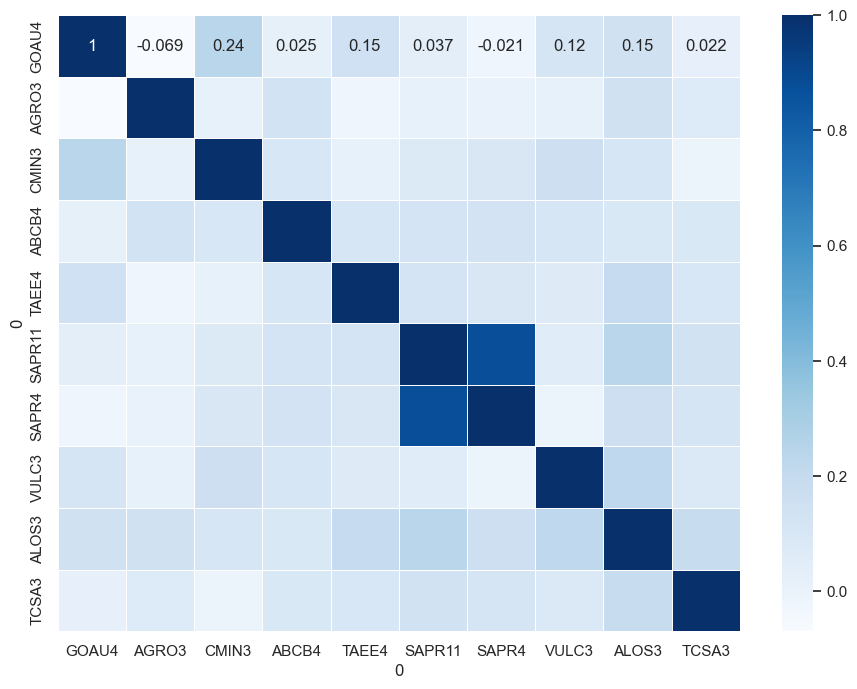

In [152]:


rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(18, 18)) 
df= df_corr.iloc[: , [0,1,2,3,4,5,6,7,8,9, 10]].copy()                          # <------------------------------------------ ALTERAR AQUI, adicionar ou remover dependendo de quantas ações tem

corr = df.corr()
plt.figure(figsize=(11,8))
sb.heatmap(corr, cmap="Blues",linewidths = 0.50, annot=True)
%matplotlib inline
plt.show()
